In [9]:
print(" Welcome to the chemical descriptor analysis script. Be careful not to break everything")

 Welcome to the chemical descriptor analysis script. Be careful not to break everything


In [11]:
val = (input("name: "))
print(f" {val} hello my name is {val}")

 Martin hello my name is Martin


In [12]:
alder = (input("Alder: "))
print(f"{val}'s age is {alder}")

Martin's age is 31


In [1]:

import rdkit as rdkit
print("rdkit imported successfully")

rdkit imported successfully


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np



In [18]:
mol = Chem.MolFromSmiles("OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O")

DRAWING MOLECULES

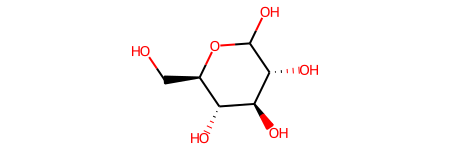

In [19]:
mol

In [20]:
smiles = Chem.MolToSmiles(mol)

In [21]:
smiles

'OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O'

EXTRACTING CHEMICAL DESCRIPTORS


In [22]:
mw = Descriptors.MolWt(mol)

In [23]:
mw

180.156

In [32]:
smiles_list = ['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O', "CC(=O)[O-]","O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O", "S"]


In [33]:
smiles_list


['OC[C@H]1OC(O)[C@H](O)[C@@H](O)[C@@H]1O',
 'CC(=O)[O-]',
 'O=P(O)(O)OP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3O',
 'S']

In [34]:
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)



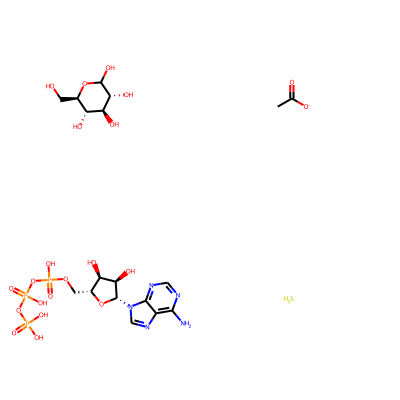

In [37]:
img = Draw.MolsToGridImage(mol_list, molsPerRow = 2, useSVG = True)

#Calls img
img

In [39]:
TCA_smile_list = [
"OC(=O)CC(O)(C(=O)O)CC(=O)O",
"C(C(=CC(=O)O)C(=O)O)C(=O)O","C(C(C(C(=O)O)O)C(=O)O)C(=O)O", 
"O=C(O)C(=O)CCC(=O)O",
"O=C(O)CCC(=O)SCCNC(=O)CCNC(=O)[C@H](O)C(C)(C)COP(=O)(O)OP(=O)(O)OC[C@H]3O[C@@H](n2cnc1c(ncnc12)N)[C@H](O)[C@@H]3OP(=O)(O)O",
"C(CC(=O)O)C(=O)O", 
"C(=C/C(=O)O)\C(=O)O", 
"O=C(O)CC(O)C(=O)O", 
"O=C(O)C(=O)CC(=O)O"]

In [42]:
TCA_draw = []
for smiles in TCA_smile_list:
    mol = Chem.MolFromSmiles(smiles)
    TCA_draw.append(mol)


In [43]:
imgTCA = Draw.MolsToGridImage(TCA_draw, molsPerRow = 3, useSVG = True)

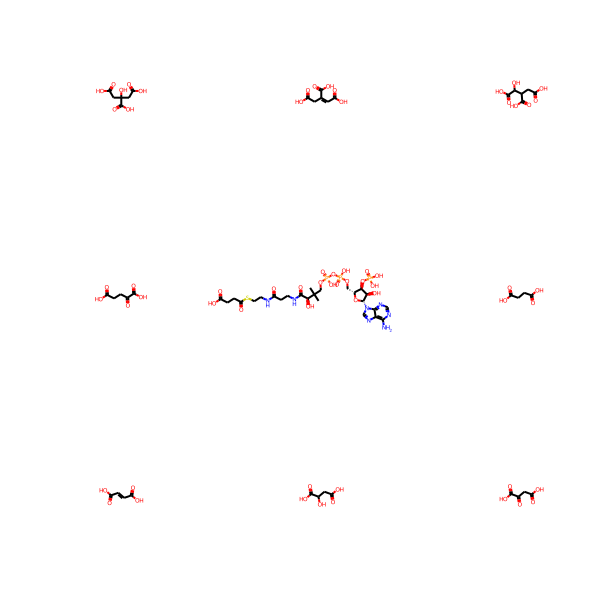

In [44]:
imgTCA

In [47]:
#pattern = Chem.MolFromSmiles("S")
pattern = Chem.MolFromSmiles("C(=O)O")

for mol in TCA_draw:
    print(mol.HasSubstructMatch(pattern))

True
True
True
True
True
True
True
True
True
